<a href="https://colab.research.google.com/github/KarolisBarzdzius/Colab/blob/master/Pristat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# Duomenys paimti is https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Echocardiogram

In [66]:
import pandas as pd
import numpy as np

In [67]:
data = pd.read_csv('hearth_f.csv')

In [68]:
data

,Survived,Still-alive,Age-at-heart-attack,Pericardial-effusion,Fractional-shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Alive-at-1
0,11,0,71,0,0.26,9,4.6,14,1,1,0
1,19,0,72,0,0.38,6,4.1,14,1.7,0.588,0
2,16,0,55,0,0.26,4,3.42,14,1,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.45,0.788,0
4,19,1,57,0,0.16,22,5.75,18,2.25,0.571,0
...,...,...,...,...,...,...,...,...,...,...,...
126,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,0
127,41,0,64,0,0.28,5.4,5.47,11,1.1,0.714,1
128,36,0,69,0,0.2,7,5.05,14.5,1.21,0.857,1
129,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,1


In [69]:
data['Age-at-heart-attack'].unique()

array(['71', '72', '55', '60', '57', '68', '62', '46', '54', '77', '73',
       '69', '62.529', '66', '85', '64', '35', '75', '65', '52', '?',
       '47', '63', '61', '80', '70', '79', '56', '67', '81', '59', '58',
       '51', '50', '78', '86', '74', '53', '48'], dtype=object)

In [70]:
data['Age-at-heart-attack'] = data['Age-at-heart-attack'].replace('?',np.nan)

In [71]:
data['Age-at-heart-attack'] = data['Age-at-heart-attack'].astype(float)

In [72]:
data['Age-at-heart-attack'].unique()

array([71.   , 72.   , 55.   , 60.   , 57.   , 68.   , 62.   , 46.   ,
       54.   , 77.   , 73.   , 69.   , 62.529, 66.   , 85.   , 64.   ,
       35.   , 75.   , 65.   , 52.   ,    nan, 47.   , 63.   , 61.   ,
       80.   , 70.   , 79.   , 56.   , 67.   , 81.   , 59.   , 58.   ,
       51.   , 50.   , 78.   , 86.   , 74.   , 53.   , 48.   ])

In [73]:
data['Age-at-heart-attack']

0      71.0
1      72.0
2      55.0
3      60.0
4      57.0
       ... 
126    64.0
127    64.0
128    69.0
129    57.0
130    62.0
Name: Age-at-heart-attack, Length: 131, dtype: float64

In [74]:
#data['Survived'].unique()

In [75]:
data['Survived'] = data['Survived'].replace('?',np.nan)

In [76]:
data['Survived'] = data['Survived'].astype(float)

In [77]:
#data['Survived']

In [78]:
#data['Fractional-shortening'].unique()

In [79]:
data['Fractional-shortening'] = data['Fractional-shortening'].replace('?',np.nan).astype(float)

In [80]:
#data['Epss'].unique()

In [81]:
data['Epss'] = data['Epss'].replace('?',np.nan).astype(float)

In [82]:
#data

In [83]:
data['Lvdd'].unique()
data['Lvdd'] = data['Lvdd'].replace('?',np.nan).astype(float)
#data['Lvdd']

In [84]:
data['Wall-motion-score'].unique()
data['Wall-motion-score'] = data['Wall-motion-score'].replace('?',np.nan).astype(float)
#data['Wall-motion-score']

In [85]:
data['Wall-motion-index'] = data['Wall-motion-index'].replace('?',np.nan).astype(float)
#data['Wall-motion-index']

In [86]:
data['Mult'] = data['Mult'].replace('?',np.nan).astype(float)
#data['Mult']

In [87]:
#data['Alive-at-1']

In [88]:
data = data.fillna(data.mean())

In [89]:
#data['Lvdd'].unique()

In [90]:
data['Alive-at-1'].value_counts()

1    67
0    64
Name: Alive-at-1, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [92]:
coll = ['Survived','Still-alive','Age-at-heart-attack','Pericardial-effusion','Fractional-shortening','Epss','Lvdd','Wall-motion-score','Wall-motion-index','Mult']
#coll = data[:,1]

In [93]:
X = data[coll]
y = data['Alive-at-1']

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=5)

In [95]:
# Susikuriam LogisticRegression modeli
logreg = LogisticRegression(max_iter=999)
logreg.fit(X_train,y_train)
predicted = logreg.predict(X_test)
accuracy_score(y_test, predicted)

0.525

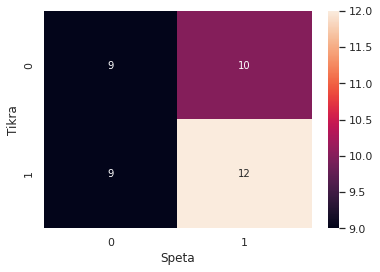

In [96]:
confmatr = pd.crosstab(y_test,predicted, rownames=['Tikra'], colnames=['Speta'])
sns.heatmap(confmatr, annot=True)

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
sns.set()

In [98]:
# Susikuriam KNeighbors modeli
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_score(y_test,knn_pred)

0.675

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
# Susikuriam Decision Tree modeli
dectree = DecisionTreeClassifier()
dectree = dectree.fit(X_train,y_train)
dectree_pred = dectree.predict(X_test)
accuracy_score(y_test, dectree_pred)

0.625

In [101]:
# criterion{“gini”, “entropy”}, default=”gini”
# The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [102]:
# Pasibandom su skirtingu criterion parametru
dectree2 = DecisionTreeClassifier(criterion='entropy')
dectree2 = dectree2.fit(X_train,y_train)
dectree2_pred = dectree2.predict(X_test)
accuracy_score(y_test, dectree2_pred)

0.65

In [103]:
# Susikuriam funkcijas prasitestuoti tiksluma pagerinancius parametrus kaip // random_state - visiems modeliams // n_neighbors - KNeighbors modeliui // 

In [104]:
def accuracy(k, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    return accuracy_score(y_test, pred)

In [105]:
def acc(X_train, y_train, X_test, y_test):
  logreg = LogisticRegression(max_iter=999)
  logreg.fit(X_train,y_train)
  predicted = logreg.predict(X_test)
  return accuracy_score(y_test,predicted)

In [106]:
def dt_acc(X_train, y_train, X_test, y_test):
  dectree = DecisionTreeClassifier(criterion='entropy')
  dectree = dectree.fit(X_train,y_train)
  dectree_pred = dectree.predict(X_test)
  return accuracy_score(y_test, dectree_pred)

In [107]:
def kazkas(sk):
  for x in range(1,sk):
    #pereinam per visus random_state parametrus
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=x)

    #susirandam tiksliausia n_neigbours parametra 
    best_n_neighbours = np.argmax(np.array([accuracy(k, X_train, y_train, X_test, y_test) for k in range(1, int(sk/2))])) + 1
    
    print("Random State: ", x)   
    print('For best accuracy use k = ', best_n_neighbours)
    print("KN acc: " , accuracy(best_n_neighbours,X_train, y_train, X_test, y_test))
    print("LR acc: ", acc(X_train, y_train, X_test, y_test))
    print('DT acc: ', dt_acc(X_train, y_train, X_test, y_test))

In [108]:
#kazkas(92)

In [109]:
# Rasti geriausi parametrai
'''
---Logistic Regression

---------Best LR -----------
Random State: 60 <-
For best accuracy use k =  7
KN acc:  0.65  
LR acc:  0.625 <-
DT acc:  0.65 
----------------------------

---KNeighbors Classifier

----------Best KN-----------
Random State: 51 <-
For best accuracy use k =  7 <-
KN acc:  0.8 <-
LR acc:  0.45  
DT acc:  0.625  
----------------------------

---DecisionTree Classifier

-----------Best--------------
Random State:  31 <-
For best accuracy use k =  6
KN acc:  0.75 
LR acc:  0.525 
DT acc:  0.825 <-

Naudojant criterion='entropy'
-----------------------------

Random State:  31 <-
For best accuracy use k =  6
KN acc:  0.75 
LR acc:  0.525 
DT acc:  0.725 <-

Naudojant default criterion='gini'
'''

"\n---Logistic Regression\n\n---------Best LR -----------\nRandom State: 60 <-\nFor best accuracy use k =  7\nKN acc:  0.65  \nLR acc:  0.625 <-\nDT acc:  0.65 \n----------------------------\n\n---KNeighbors Classifier\n\n----------Best KN-----------\nRandom State: 51 <-\nFor best accuracy use k =  7 <-\nKN acc:  0.8 <-\nLR acc:  0.45  \nDT acc:  0.625  \n----------------------------\n\n---DecisionTree Classifier\n\n-----------Best--------------\nRandom State:  31 <-\nFor best accuracy use k =  6\nKN acc:  0.75 \nLR acc:  0.525 \nDT acc:  0.825 <-\n\nNaudojant criterion='entropy'\n-----------------------------\n\nRandom State:  31 <-\nFor best accuracy use k =  6\nKN acc:  0.75 \nLR acc:  0.525 \nDT acc:  0.725 <-\n\nNaudojant default criterion='gini'\n"

In [110]:
# Ieskome KNeighborsClassifier 'metric' parametro kuris galetu padidinti KNeighborsClassifier modelio tiksluma 
import sklearn
'''
def acc2(xx):
  knn = KNeighborsClassifier(n_neighbors=7,metric=xx)
  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)  
  return accuracy_score(y_test, pred)

listas = sklearn.neighbors.VALID_METRICS['brute']

for l in listas:
  try:
    print('Metric: ',acc2(l),l)
  except:
    pass
'''

"\ndef acc2(xx):\n  knn = KNeighborsClassifier(n_neighbors=7,metric=xx)\n  knn.fit(X_train,y_train)\n  pred = knn.predict(X_test)  \n  return accuracy_score(y_test, pred)\n\nlistas = sklearn.neighbors.VALID_METRICS['brute']\n\nfor l in listas:\n  try:\n    print('Metric: ',acc2(l),l)\n  except:\n    pass\n"

In [111]:
# Didziausia tiksluma parodes Modelis
# KNeighbors Classifier naudojant geriausius rastus parametrus. n_neigbours - 7 / randoms_state - 51 / metric - ['euclidean','l2','nan_euclidean','minkowski','sqeuclidean']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=51)
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')    
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.8

In [112]:
# Antras pagal tiksluma modelis / auksciausias uzfiksuotas tikslumas - 0.825
# DecisionTree Classifier naudojant random_state - 31 / criterion - ['entropy']  ... kad ir nustatytas randoms_state tikslumas vistiek keiciasi
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=31)
dectree = DecisionTreeClassifier(criterion='entropy')
dectree = dectree.fit(X_train,y_train)
dectree_pred = dectree.predict(X_test)
accuracy_score(y_test, dectree_pred)


#for x in range(1,6):
#  dectree = dectree.fit(X_train,y_train)
#  dectree_pred = dectree.predict(X_test)
#  print(accuracy_score(y_test, dectree_pred))


0.725

In [113]:
# Trecias pagal tiksluma modelis
# Logistic Regression naudojant random_state - 60
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=60)
logreg = LogisticRegression(max_iter=999)
logreg.fit(X_train,y_train)
lg_pred = logreg.predict(X_test)
accuracy_score(y_test,lg_pred)

0.625

In [114]:
data['Alive-at-1'].value_counts()

1    67
0    64
Name: Alive-at-1, dtype: int64

Text(0, 0.5, 'Quantity')

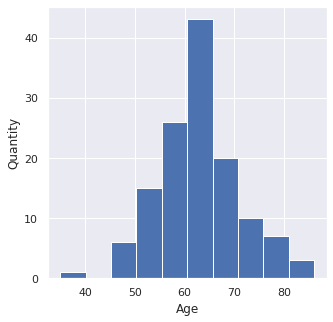

In [115]:
data['Age-at-heart-attack'].hist(figsize=(5,5))
plt.xlabel('Age')
plt.ylabel('Quantity')

In [116]:
# Matome kad didzioji dalis zmoniu gavusiu sirdies smugi buvo tarp 55-65 metu amziaus.

In [117]:
# Funkcija kuri grafiskai atvaizduoja skirtingu stulpeliu rodiklius tarp neisgyvenusio ir isgyvenusio zmogaus
# Is https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features/56301555
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt


def plot_densities(data):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = data[data['Alive-at-1'] == 0]
    outcome_1 = data[data['Alive-at-1'] == 1]

    # init figure
    fig, axs = plt.subplots(10, 1)
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' / Mires')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' / Gyvas')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')


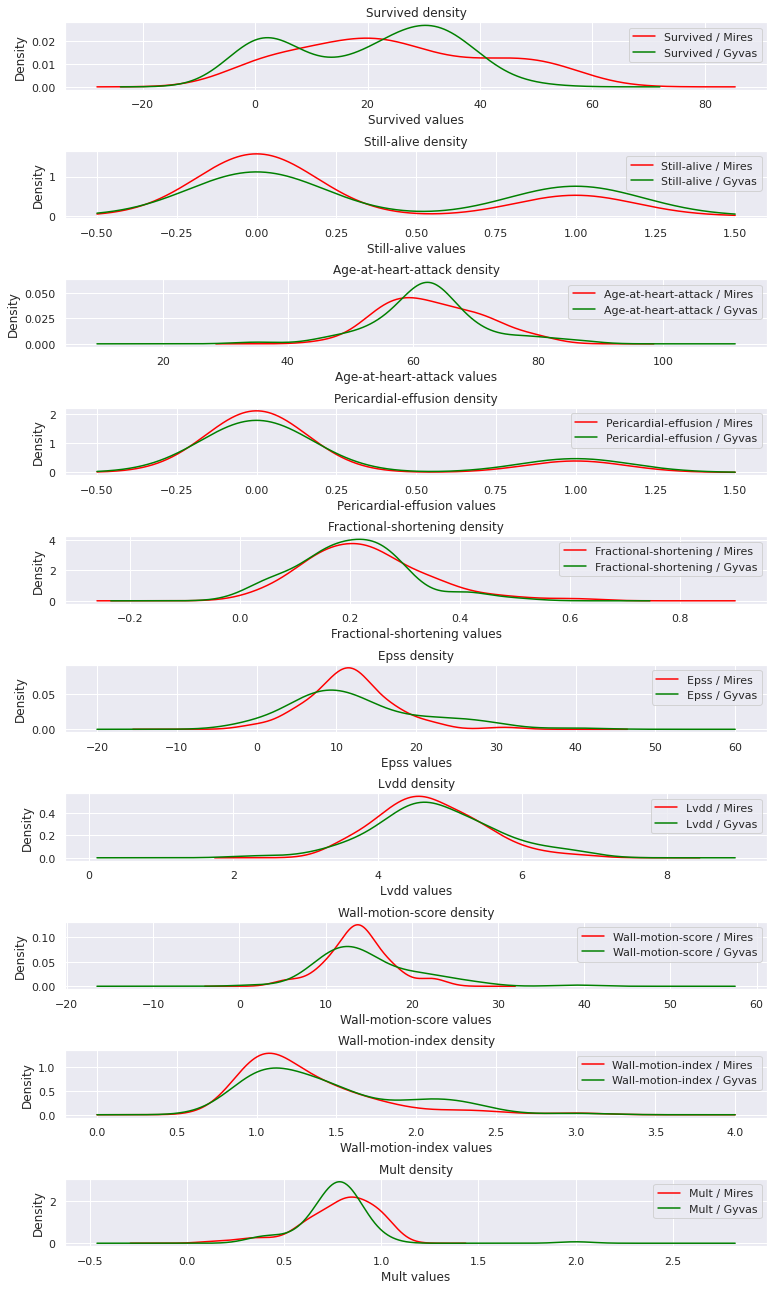

In [118]:
names = list(data.columns)
plot_densities(data)

In [119]:
# Didziausi skirtumai yra siuose stulpeliuose ['Wall-motion-score'],['Epss'],['Age-at-heart-attack'] todel juos ir naudosime atvaizduojant/lyginant.

In [120]:
%matplotlib inline

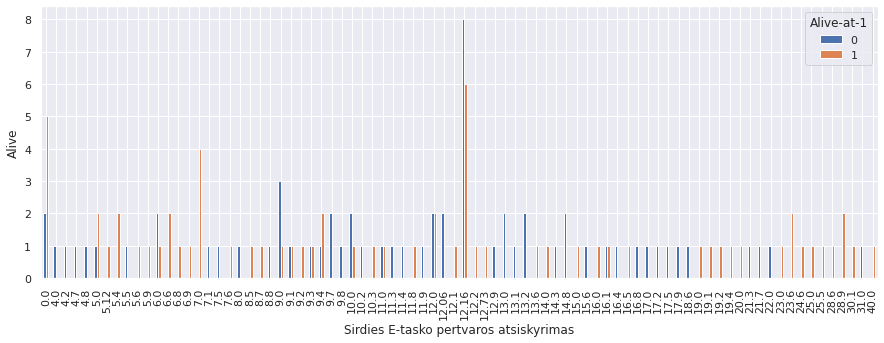

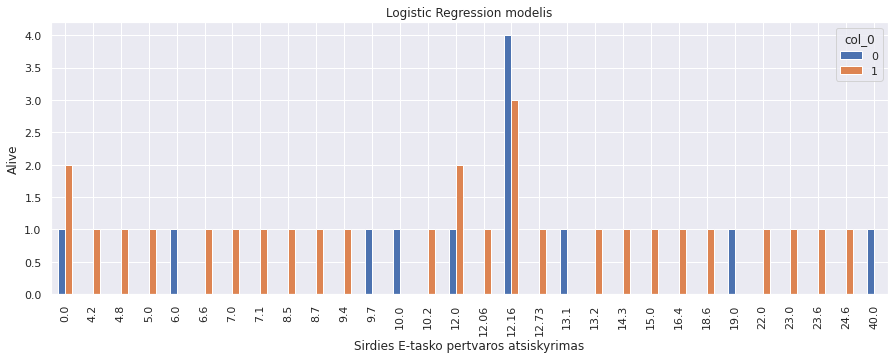

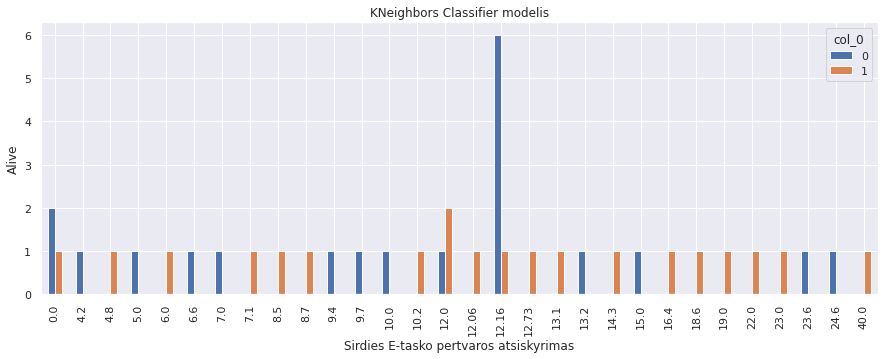

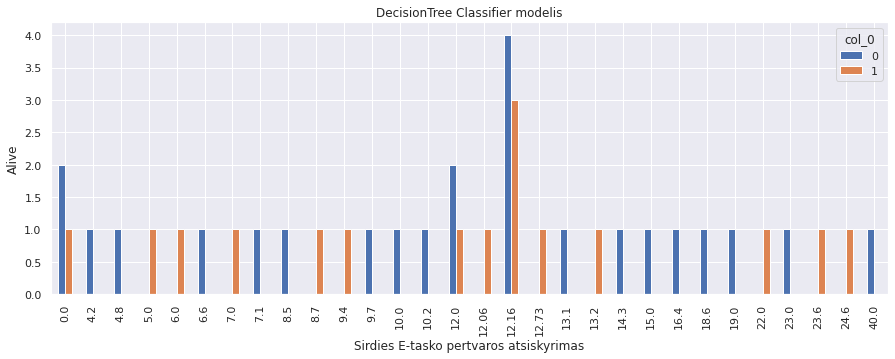

In [121]:
pd.crosstab(data['Epss'].round(2),data['Alive-at-1']).plot(kind='bar',figsize=(15,5))
plt.xlabel('Sirdies E-tasko pertvaros atsiskyrimas')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Epss'].round(2),lg_pred).plot(kind='bar',figsize=(15,5))
plt.title('Logistic Regression modelis')
plt.xlabel('Sirdies E-tasko pertvaros atsiskyrimas')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Epss'].round(2),knn_pred).plot(kind='bar',figsize=(15,5))
plt.title('KNeighbors Classifier modelis')
plt.xlabel('Sirdies E-tasko pertvaros atsiskyrimas')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Epss'].round(2),dectree_pred).plot(kind='bar',figsize=(15,5))
plt.title('DecisionTree Classifier modelis')
plt.xlabel('Sirdies E-tasko pertvaros atsiskyrimas')
plt.ylabel('Alive')
plt.show()

In [122]:
# Atsiskirimas skaiciuojamas (mm). "E-point septal separation, another measure of contractility" "skilvelio atsiskirimas/atsitraukimas, kitokia priemone skaiciuoti susitraukimus"
# Pagal originala didziausi neisgyvenusiu zmoniu rodikliai buvo 9 mm ir 12.16 mm pertvaros atsitraukimas. O pagal Modelius - 12.16 mm .KNeighbors( 0,12.16 ) // DecisionTree( 12,12.16 ) // LogisticRegression( 12.16 )

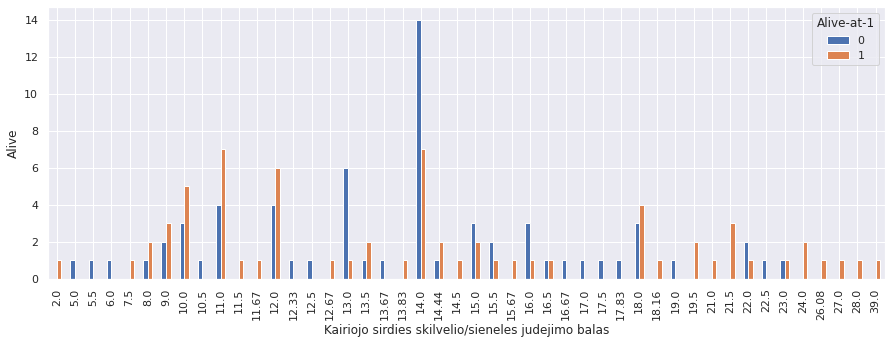

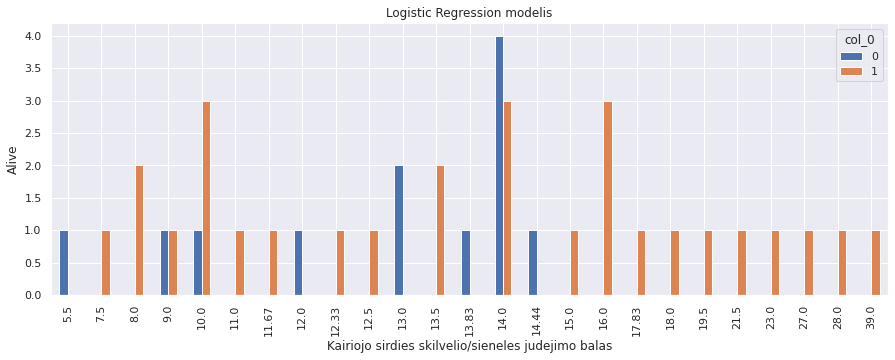

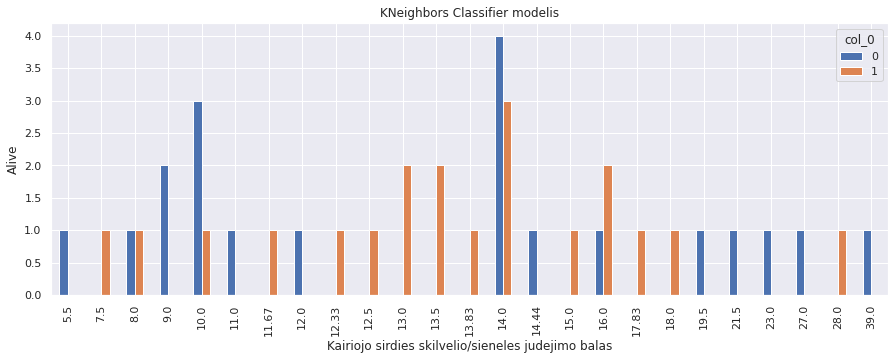

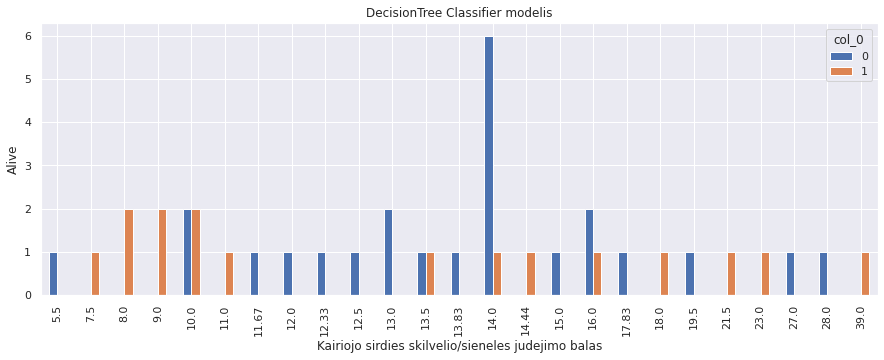

In [123]:
pd.crosstab(data['Wall-motion-score'].round(2),data['Alive-at-1']).plot(kind='bar',figsize=(15,5))
plt.xlabel('Kairiojo sirdies skilvelio/sieneles judejimo balas')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Wall-motion-score'].round(2),lg_pred).plot(kind='bar',figsize=(15,5))
plt.title('Logistic Regression modelis')
plt.xlabel('Kairiojo sirdies skilvelio/sieneles judejimo balas')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Wall-motion-score'].round(2),knn_pred).plot(kind='bar',figsize=(15,5))
plt.title('KNeighbors Classifier modelis')
plt.xlabel('Kairiojo sirdies skilvelio/sieneles judejimo balas')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Wall-motion-score'].round(2),dectree_pred).plot(kind='bar',figsize=(15,5))
plt.title('DecisionTree Classifier modelis')
plt.xlabel('Kairiojo sirdies skilvelio/sieneles judejimo balas')
plt.ylabel('Alive')
plt.show()

In [124]:
# ''Left ventricular wall motion score index (WMSI), defined as the average wall motion score of 17''
# Pagal originala didziausi neisgyvenusiu zmoniu rodikliai priklauso 13,14 balu skilvelio judejimui. O pagal Modelius - 14 balu. Balai mazesni uz vidutinius rodiklius. KNeighbors( 10,14 ) // DecisionTree( 14,16 ) // LogisticRegression( 13,14 )

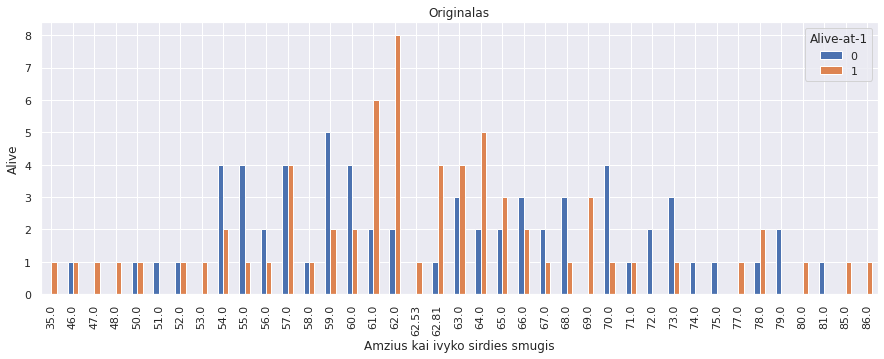

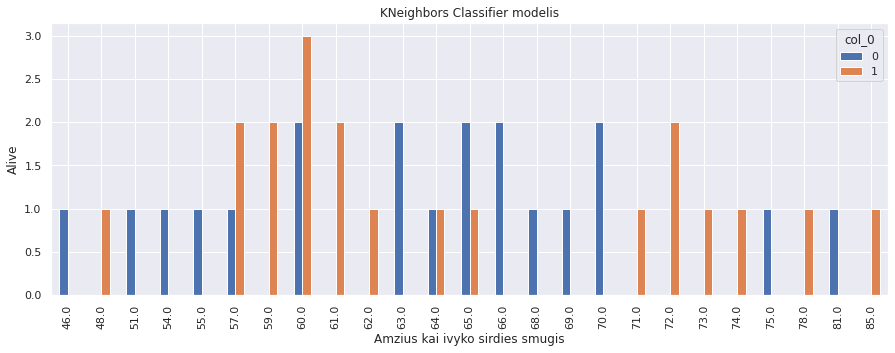

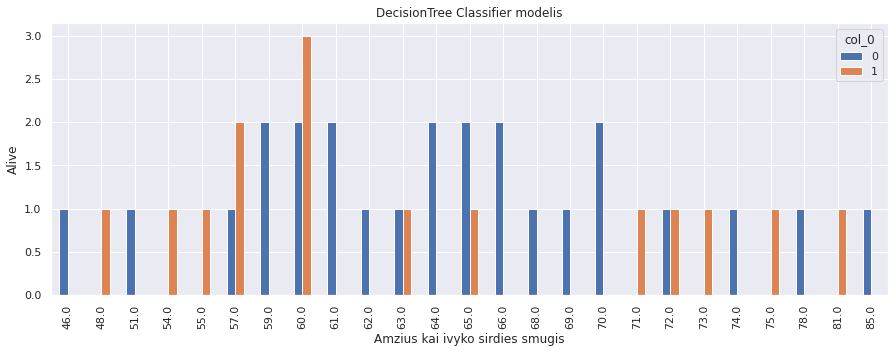

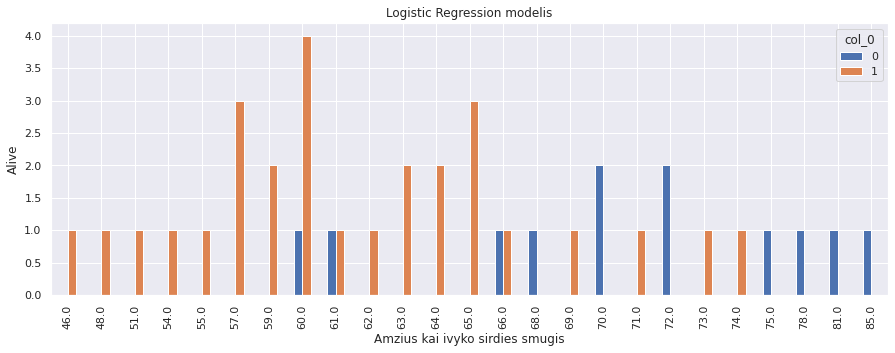

In [61]:
pd.crosstab(data['Age-at-heart-attack'].round(2),data['Alive-at-1']).plot(kind='bar',figsize=(15,5))
plt.title("Originalas")
plt.xlabel('Amzius kai ivyko sirdies smugis')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Age-at-heart-attack'],knn_pred).plot(kind='bar',figsize=(15,5))
plt.title('KNeighbors Classifier modelis')
plt.xlabel('Amzius kai ivyko sirdies smugis')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Age-at-heart-attack'],dectree_pred).plot(kind='bar',figsize=(15,5))
plt.title('DecisionTree Classifier modelis')
plt.xlabel('Amzius kai ivyko sirdies smugis')
plt.ylabel('Alive')
plt.show()

pd.crosstab(X_test['Age-at-heart-attack'],lg_pred).plot(kind='bar',figsize=(15,5))
plt.title('Logistic Regression modelis')
plt.xlabel('Amzius kai ivyko sirdies smugis')
plt.ylabel('Alive')
plt.show()

In [62]:
# Pagal originala didziausi isgyvenimo rodikliai priklause 61,62 ir 64 metu amziaus zmonems. O pagal Modelius - 57,60 metu zmonems. KNeighbors( 60,57-61 ) // DecisionTree( 57,60 ) // LogisticRegression( 60,57,65 ) 

In [63]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


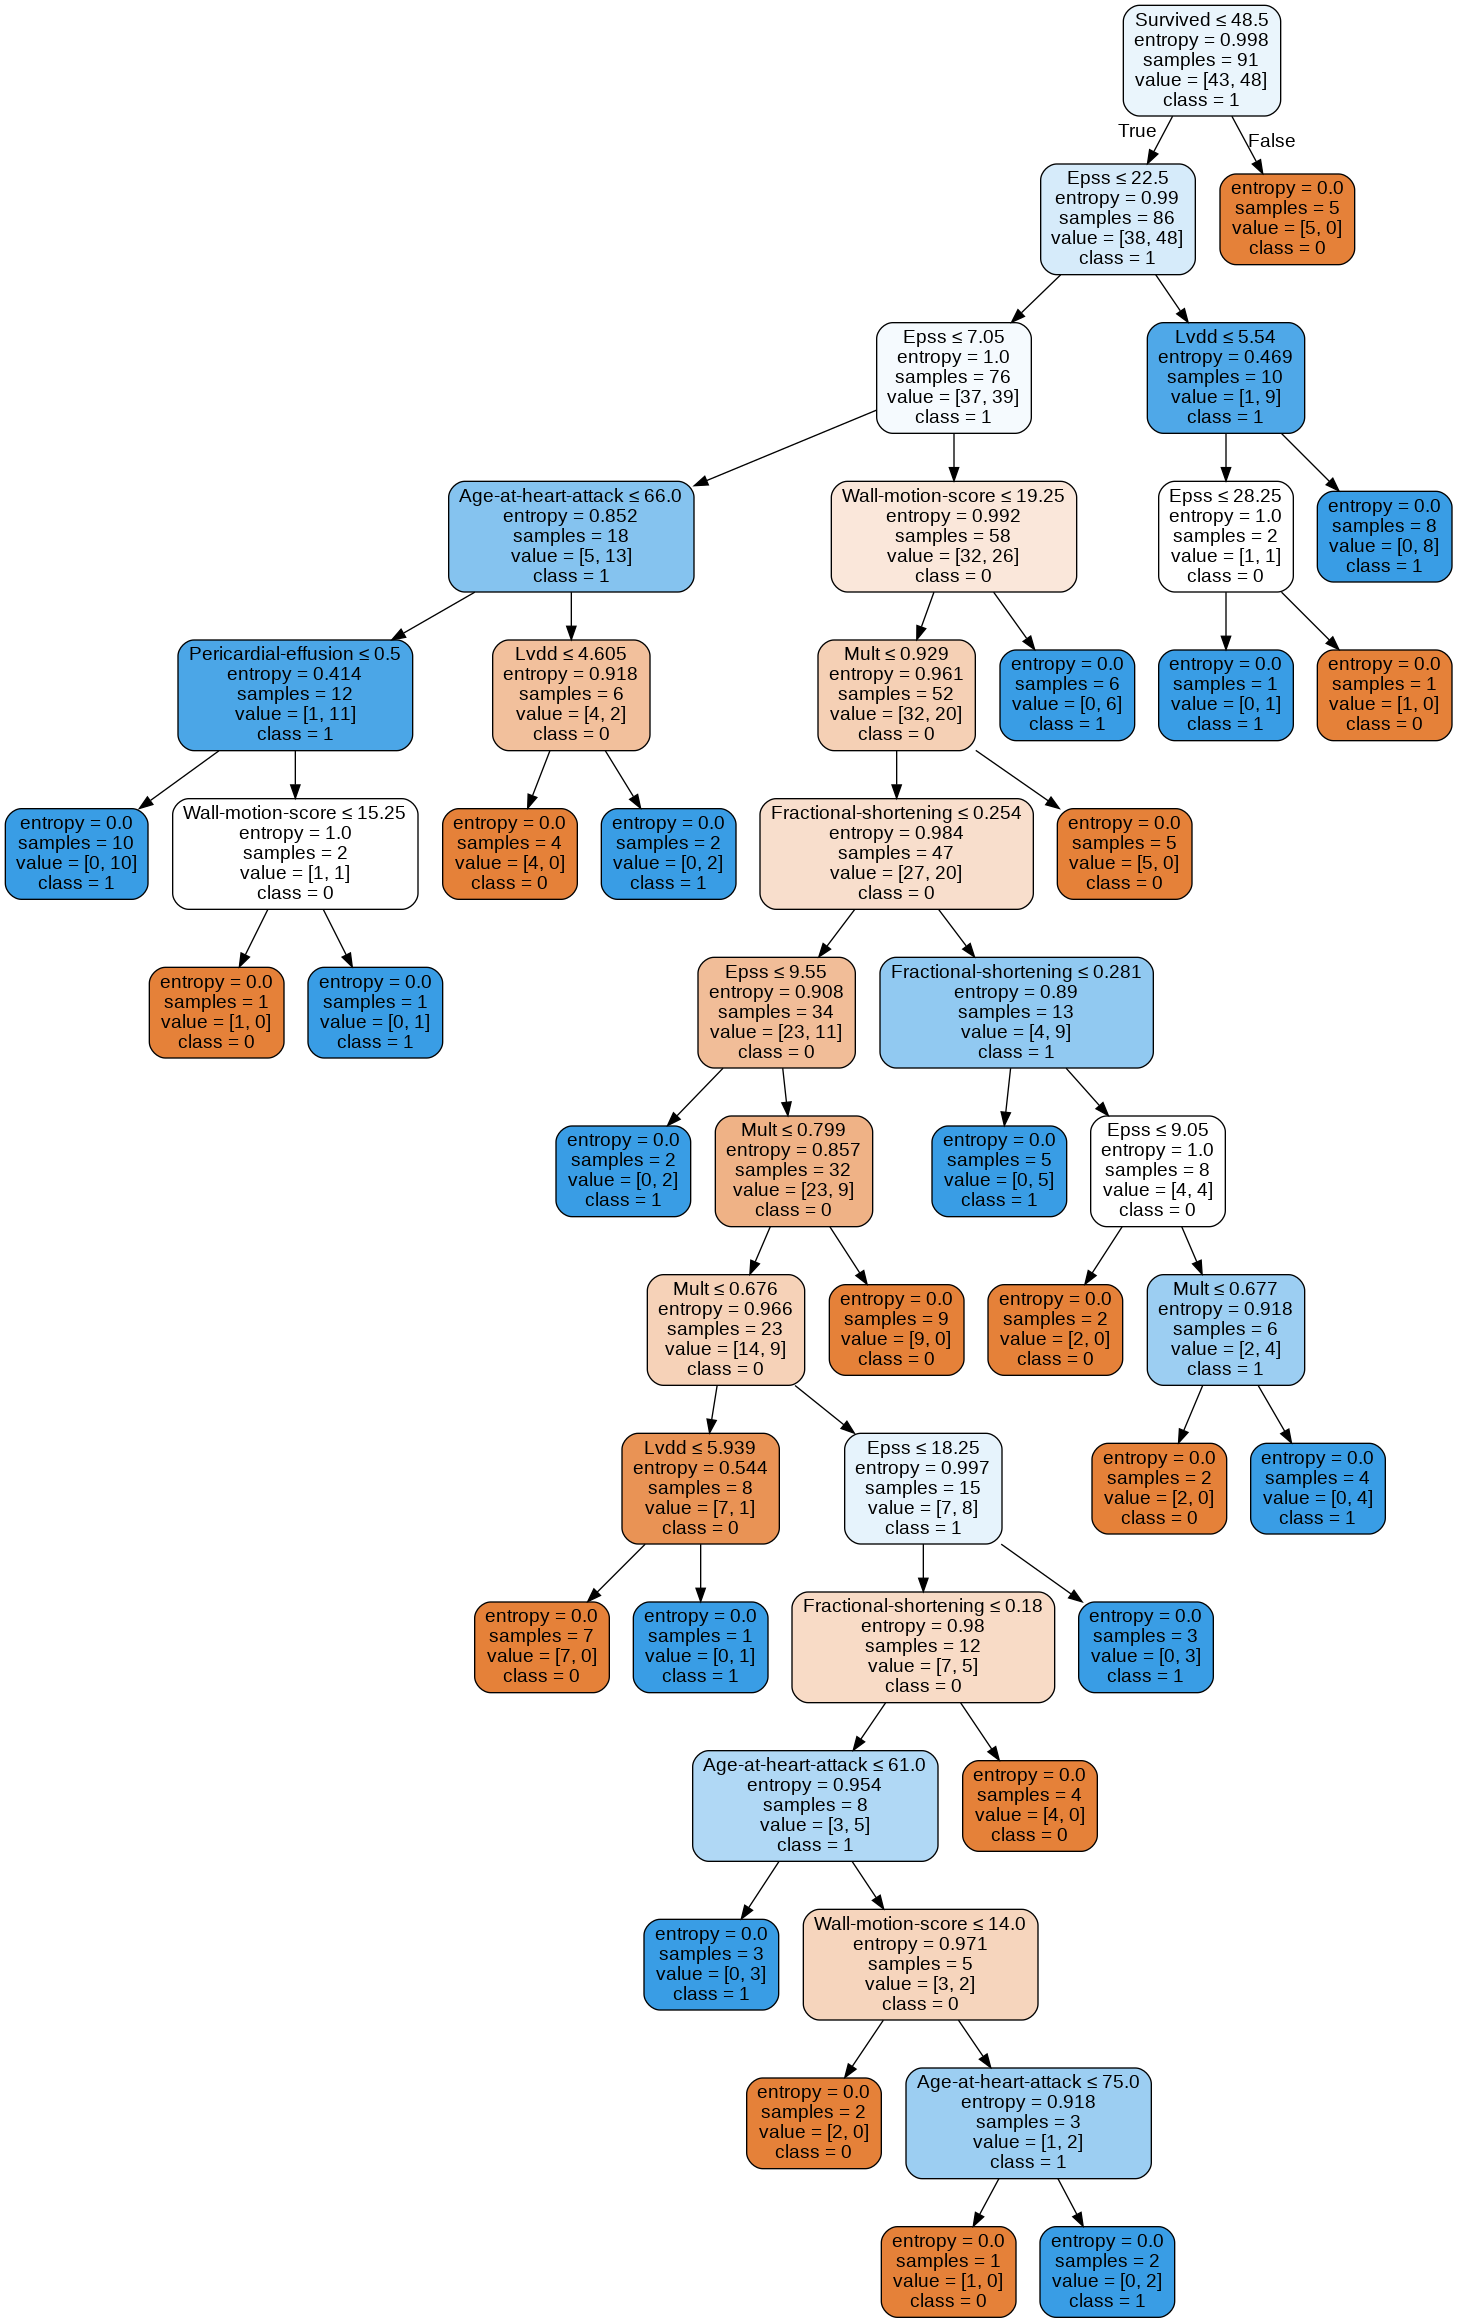

In [64]:
# DecisionTree Atvaizdavimas
dot_data = StringIO()
export_graphviz(dectree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = coll ,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hearth.png')
Image(graph.create_png())